In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline

In [2]:
# loans_tr 데이터를 load
dt = pd.read_csv('loans_tr.csv')

In [3]:
dt.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [5]:
dt.shape

(8578, 15)

In [6]:
dt.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
dt['purpose'].value_counts()

debt_consolidation    3547
all_other             2082
credit_card           1143
home_improvement       556
small_business         547
major_purchase         395
educational            308
Name: purpose, dtype: int64

In [8]:
dt['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

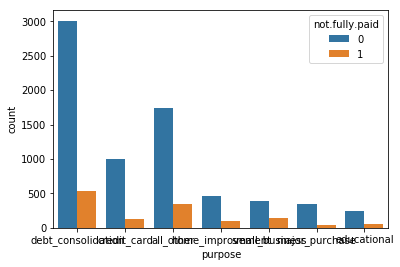

In [9]:
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = dt)

In [10]:
ob = ['purpose']

In [11]:
final_dt = pd.get_dummies(dt, columns = ob, drop_first = True)

In [12]:
final_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 19 columns):
credit.policy                 8578 non-null int64
int.rate                      8578 non-null float64
installment                   8578 non-null float64
log.annual.inc                8578 non-null float64
dti                           8578 non-null float64
fico                          8578 non-null int64
days.with.cr.line             8578 non-null float64
revol.bal                     8578 non-null int64
revol.util                    8578 non-null float64
inq.last.6mths                8578 non-null int64
delinq.2yrs                   8578 non-null int64
pub.rec                       8578 non-null int64
not.fully.paid                8578 non-null int64
purpose_credit_card           8578 non-null uint8
purpose_debt_consolidation    8578 non-null uint8
purpose_educational           8578 non-null uint8
purpose_home_improvement      8578 non-null uint8
purpose_major_purchase        8

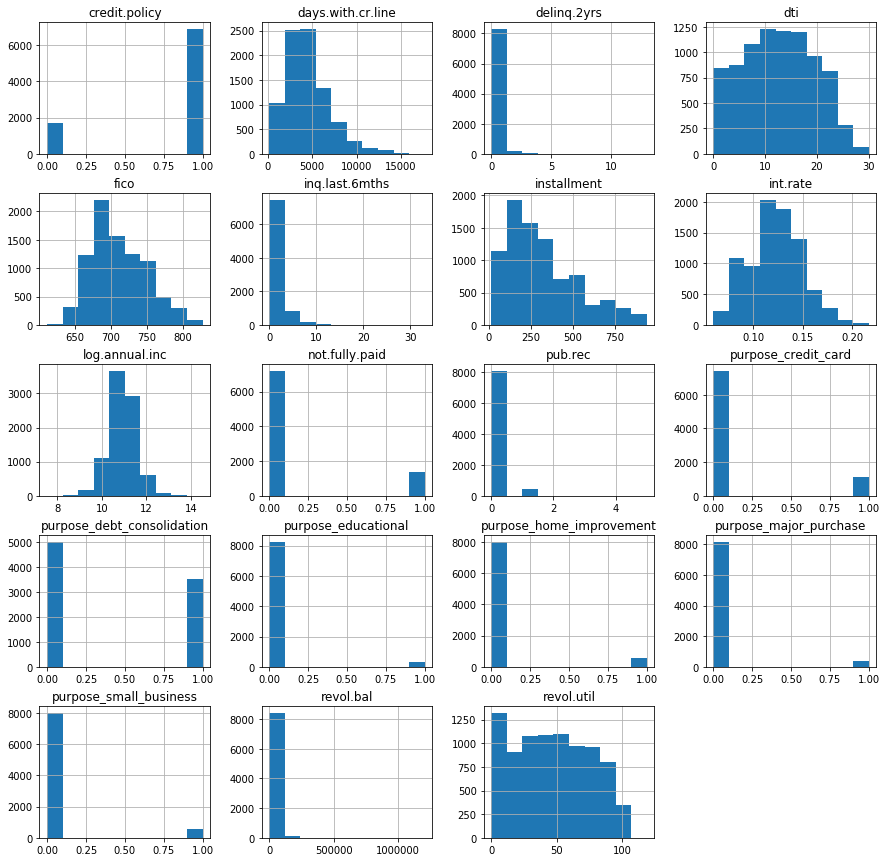

In [13]:
# histograms
plt.rcParams['figure.figsize'] = (15,15)
final_dt.hist()
plt.show()

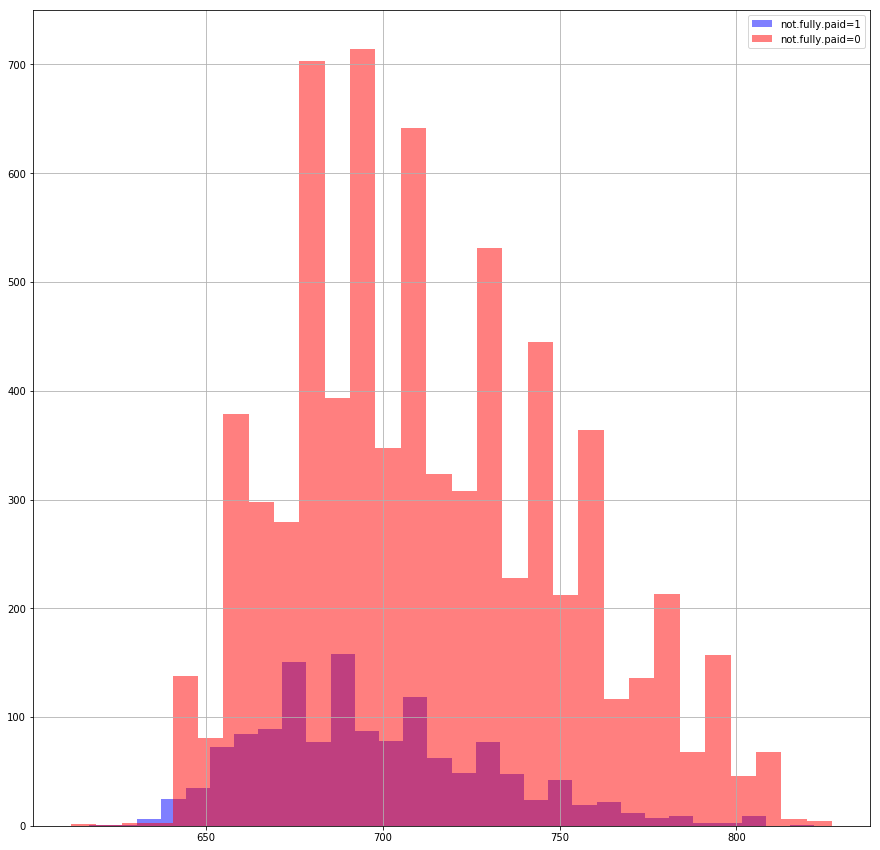

In [14]:
final_dt[final_dt['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'not.fully.paid=1')
final_dt[final_dt['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5, color = 'red', bins = 30, label = 'not.fully.paid=0')
plt.legend()

In [15]:
# X_data, y_data division
from sklearn.model_selection import train_test_split

x = final_dt.drop('not.fully.paid', axis = 1)
y = final_dt['not.fully.paid']

In [16]:
# train data, test data division
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [17]:
# Compare Algorithms - model selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [18]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_

In [19]:
# cross validaton을 통해 optimal model selection
results = []
names = []
for name, model in models:
    
    kf = KFold(n_splits = 10, random_state = 15)
    cv_results = cross_val_score(model, x_train, y_train, cv = kf, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
print(results)

LR: 0.838765 (0.015141)
SVC: 0.838931 (0.014062)
KNN: 0.819278 (0.013969)
CART: 0.739502 (0.010087)
NB: 0.820443 (0.019384)
RF: 0.832935 (0.015174)
[array([0.85856905, 0.8469218 , 0.84193012, 0.86522463, 0.84      ,
       0.82666667, 0.83166667, 0.84166667, 0.82      , 0.815     ]), array([0.86023295, 0.8469218 , 0.8452579 , 0.86023295, 0.83833333,
       0.825     , 0.83333333, 0.84      , 0.82333333, 0.81666667]), array([0.8452579 , 0.82196339, 0.82362729, 0.83860233, 0.81333333,
       0.80166667, 0.81833333, 0.82166667, 0.81      , 0.79833333]), array([0.75707155, 0.74043261, 0.74542429, 0.74209651, 0.73666667,
       0.715     , 0.74333333, 0.73666667, 0.74333333, 0.735     ]), array([0.83527454, 0.82695507, 0.82196339, 0.85856905, 0.83833333,
       0.8       , 0.81333333, 0.815     , 0.80666667, 0.78833333]), array([0.84858569, 0.84858569, 0.83693844, 0.85856905, 0.83833333,
       0.815     , 0.825     , 0.83      , 0.81666667, 0.81166667])]


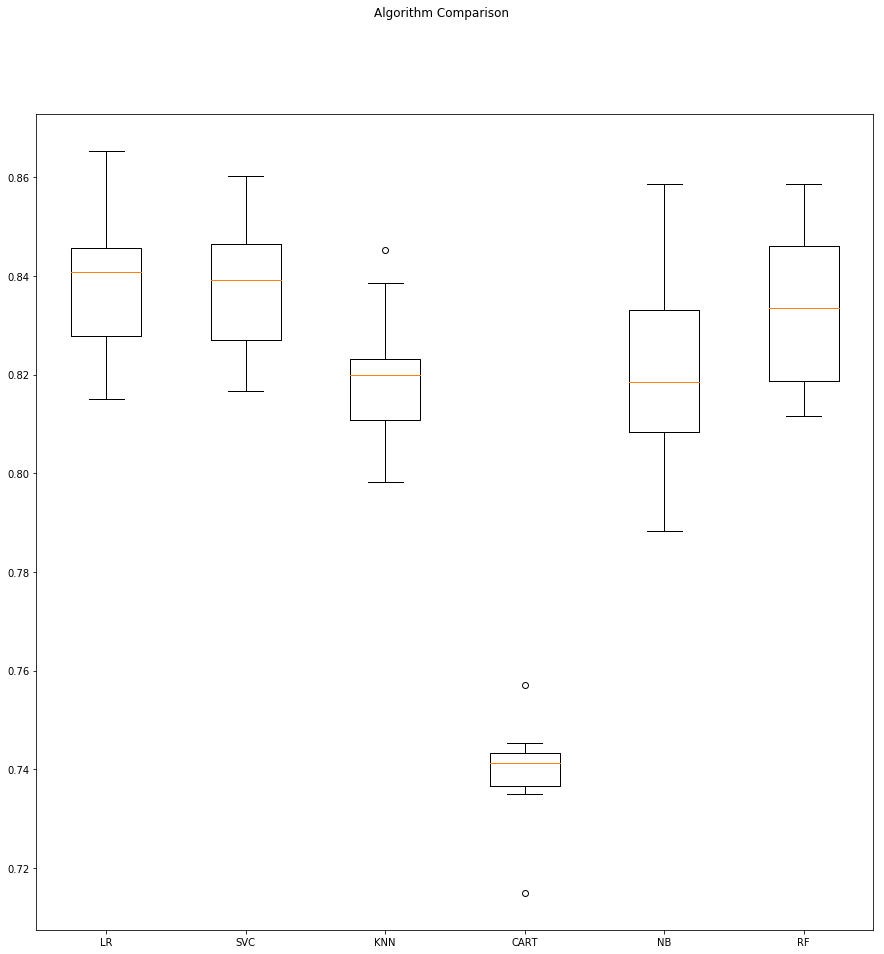

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
# pipeline을 활용해서 scaling하고 optimal model selection
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [22]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])),
 ('ScaledSVC', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_

In [23]:
num_instances = len(x_train)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits = 10, random_state = 15)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print(results)

ScaledLR: 0.838599 (0.013250)
ScaledSVC: 0.838930 (0.014763)
ScaledKNN: 0.822275 (0.015143)
ScaledCART: 0.741999 (0.015619)
ScaledNB: 0.777810 (0.014432)
ScaledRF: 0.829271 (0.014304)
[array([0.85690516, 0.85191348, 0.84026622, 0.85856905, 0.84      ,
       0.82666667, 0.83      , 0.83833333, 0.82666667, 0.81666667]), array([0.86189684, 0.85024958, 0.8452579 , 0.86023295, 0.83666667,
       0.82166667, 0.83      , 0.84      , 0.82666667, 0.81666667]), array([0.84026622, 0.83527454, 0.82695507, 0.8469218 , 0.82166667,
       0.82      , 0.82166667, 0.81      , 0.80333333, 0.79666667]), array([0.76705491, 0.74209651, 0.74209651, 0.75707155, 0.74333333,
       0.70333333, 0.74666667, 0.73666667, 0.745     , 0.73666667]), array([0.77537438, 0.78702163, 0.78369384, 0.7953411 , 0.80333333,
       0.77      , 0.77666667, 0.76      , 0.77333333, 0.75333333]), array([0.8452579 , 0.84026622, 0.83194676, 0.85524126, 0.83333333,
       0.805     , 0.82      , 0.82666667, 0.82      , 0.815     ])]

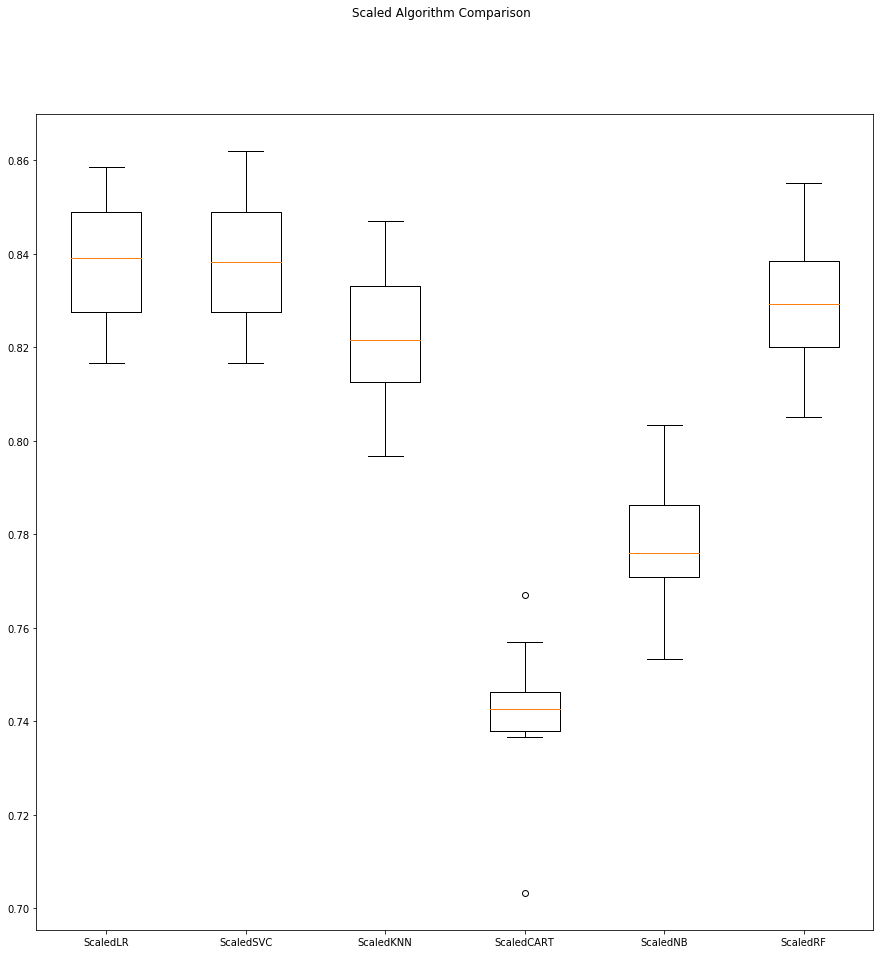

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
logistic_regression = LogisticRegression(random_state=1)
logistic_regression.fit(x_train, y_train)
pred_logistic = logistic_regression.predict(x_test)

In [26]:
logistic_regression.coef_, logistic_regression.intercept_

(array([[-6.39280550e-02,  5.66975983e-03,  9.24094623e-04,
         -9.05169900e-03,  4.65977523e-03, -3.21624413e-03,
         -3.78148825e-05,  2.04588171e-06,  5.67996906e-03,
          1.42622597e-01,  2.09399024e-02,  2.22179075e-02,
         -3.43735126e-02, -4.78618875e-02,  7.59293464e-03,
          2.44756899e-03, -4.70019612e-03,  4.99643586e-02]]),
 array([0.0083276]))

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(confusion_matrix(y_test, pred_logistic))
print(classification_report(y_test, pred_logistic))
print('f1 정확도 : ', f1_score(y_test, pred_logistic))

[[2161   11]
 [ 399    3]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2172
           1       0.21      0.01      0.01       402

   micro avg       0.84      0.84      0.84      2574
   macro avg       0.53      0.50      0.46      2574
weighted avg       0.75      0.84      0.77      2574

f1 정확도 :  0.014423076923076924


In [28]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(logistic_regression, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(logistic_regression, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.8377748197448696
cv 테스트 세트 정확도 :  0.8414894579676048


In [29]:
print('훈련 세트 정확도 :   ', logistic_regression.score(x_train, y_train))
print('테스트 세트 정확도 : ', logistic_regression.score(x_test, y_test))

훈련 세트 정확도 :    0.8379413724183877
테스트 세트 정확도 :  0.8407148407148407


In [30]:
svc = SVC(random_state=1)
svc.fit(x_train, y_train)
pred_svc= svc.predict(x_test)

In [ ]:
params = {'C':[0.1,0.5,1,2,4,8,20,200], 'gamma':[0.1,1,10,100,1000]}
grid = GridSearchCV(svc, param_grid = params)
grid.fit(x_train, y_train)
pred_grid = grid.predict(x_test)

In [ ]:
grid.best_score_, grid.best_params_

In [ ]:
print(confusion_matrix(y_test, pred_grid))
print(classification_report(y_test, pred_grid))
print('f1 정확도 : ', f1_score(y_test, pred_grid))

In [ ]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(grid, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(grid, x_test, y_test, cv=5)))

In [ ]:
print('훈련 세트 정확도 :   ', grid.score(x_train, y_train))
print('테스트 세트 정확도 : ', grid.score(x_test, y_test))

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 500, subsample = 0.5, max_depth = 3, learning_rate = 0.1)
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.55, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print(confusion_matrix(y_test, pred_gbr)
print(classification_report(y_test, pred_gbr))
print('f1 정확도 : ', f1_score(y_test, pred_gbr))

In [ ]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(gbr, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(gbr, x_test, y_test, cv=5)))

In [ ]:
print('훈련 세트 정확도 :   ', gbr.score(x_train, y_train))
print('테스트 세트 정확도 : ', gbr.score(x_test, y_test))

In [ ]:
gbr.best_params_

In [ ]:
gbr.best_score_

In [ ]:
gbr.score(x_test, y_test)

In [ ]:
models = [logistic_regression, svc,  gbr]

for model in models:
    print(model)
    print('train score: ', model.score(x_train, y_train))
    print('test score:  ', model.score(x_test, y_test))
    print('f1 score:    ', f1_score(y_test, model.predict(x_test)))
    print('-'*20)

In [ ]:
# final test score - test data